In [1]:
### mports ###
import numpy as np
import matplotlib.pyplot as plt
from numpy import exp, log, sqrt
from scipy.special import erf

In [3]:
#### Black-Scholes ####
def bsexact(sigma: float, R: float, K: float, T: float, s: float):
    d1 = (log(s/K)+(R+0.5*sigma**2)*T)/(sigma*sqrt(T))
    d2 = d1-sigma*sqrt(T)
    F = 0.5*s*(1+erf(d1/sqrt(2)))-exp(-R*T)*K*0.5*(1+erf(d2/sqrt(2)))
    return F

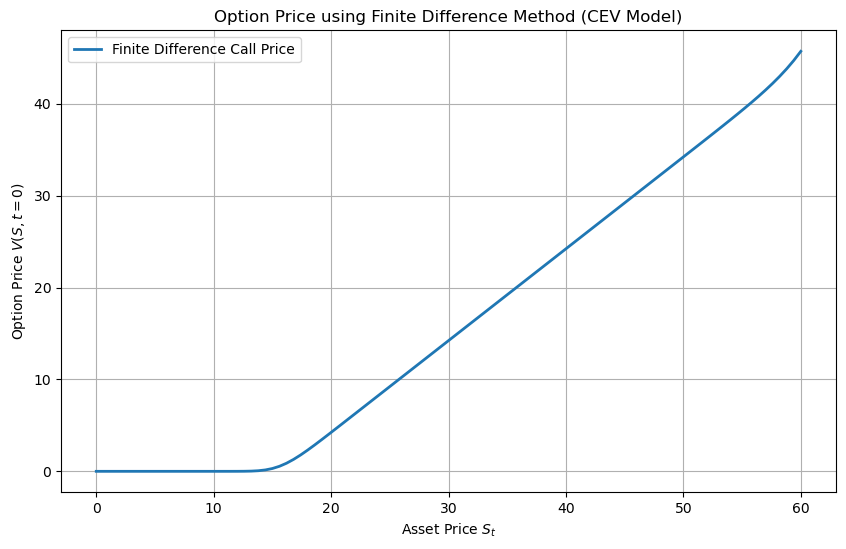

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Finite difference parameters
K = 15          # Strike price
S_max = 4 * K    # Maximum asset price
S_min = 0       # Minimum asset price
r = 0.1         # Risk-free rate
sigma = 0.25    # Volatility
gamma = 0.8     # Elasticity parameter (CEV model)
T = 0.5         # Time to maturity
t_0 = 0         # Initial time
N_s = 100       # Number of asset price grid points
N_t = 500       # Number of time steps

# Discretization of asset price and time
dS = (S_max - S_min) / N_s
dt = T / N_t

# Asset price grid
S = np.linspace(S_min, S_max, N_s+1)

# Time grid
t = np.linspace(t_0, T, N_t+1)

# Initialize the option price matrix
V = np.zeros((N_s+1, N_t+1))

# Payoff at maturity (t = T) for a European call option
V[:, -1] = np.maximum(S - K, 0)

# Boundary conditions
V[0, :] = 0  # V(S=0, t) = 0 for a call option
V[-1, :] = S_max - K * np.exp(-r * (T - t))  # V(S_max, t) behaves like S - K at large S

# Vectorized Finite difference loop (explicit method)
for j in reversed(range(N_t)):  # Loop over time from T to 0
    delta = (V[2:, j+1] - V[:-2, j+1]) / (2 * dS)  # First derivative (vectorized)
    gamma_term = (V[2:, j+1] - 2 * V[1:-1, j+1] + V[:-2, j+1]) / (dS ** 2)  # Second derivative (vectorized)

    # CEV-based sigma term (S^gamma)
    diffusion_term = 0.5 * sigma**2 * S[1:-1]**(2 * gamma) * gamma_term
    drift_term = r * S[1:-1] * delta
    discount_term = r * V[1:-1, j+1]

    # Update option value using finite differences (vectorized)
    V[1:-1, j] = V[1:-1, j+1] + dt * (diffusion_term - drift_term + discount_term)

# Extract the option prices at time t=0
option_price_finite_diff = V[:, 0]

# Plot the option price as a function of asset price
plt.figure(figsize=(10, 6))
plt.plot(S, option_price_finite_diff, label="Finite Difference Call Price", lw=2)
plt.xlabel('Asset Price $S_t$')
plt.ylabel('Option Price $V(S, t=0)$')
plt.title('Option Price using Finite Difference Method (CEV Model)')
plt.legend()
plt.grid(True)
plt.show()